In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# This will check for duplicates
duplicate_rows = df.duplicated()
duplicate_rows.sum()

3854

In [7]:
# This will remove duplicates
df.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13148\4166725823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


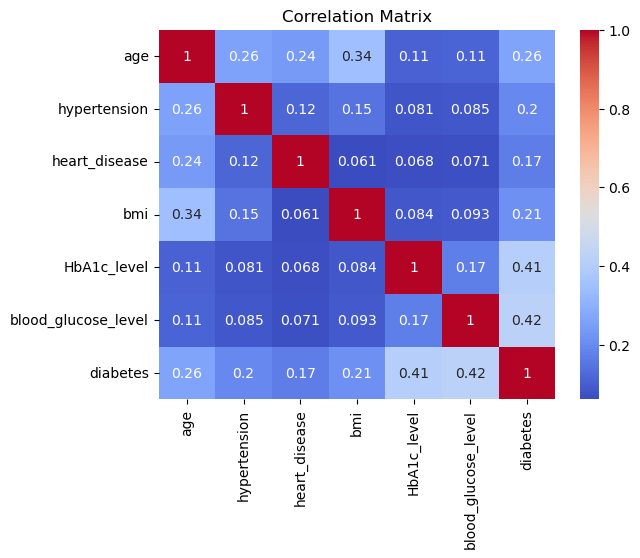

In [8]:
# Correlation matrix to visualize the correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [9]:
# Create a new feature: BMI Category
bins = [0, 18.5, 24.9, 29.9, float("inf")]
labels = ["underweight", "normal", "overweight", "obese"]
df["bmi_category"] = pd.cut(df["bmi"], bins=bins, labels=labels, right=False)

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
df["gender_encoded"] = label_encoder.fit_transform(df["gender"])
df["smoking_history_encoded"] = label_encoder.fit_transform(df["smoking_history"])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=["bmi_category"], drop_first=True)

# Print the updated DataFrame with new features
print(df_encoded.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  gender_encoded  \
0          6.6                  140         0               0   
1          6.6                   80         0               0   
2          5.7                  158         0               1   
3          5.0                  155         0               0   
4          4.8                  155         0               1   

   smoking_history_encoded  bmi_category_normal  bmi_category_overweight  \
0                        4                    0                        1   
1                        0    

In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
 
#---features---
X = df[['age','bmi','blood_glucose_level']]
 
#---label---
y = df.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# DECISION TREE

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)

In [13]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [14]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[0.94312556, 0.05687444],
       [0.        , 1.        ],
       [0.94312556, 0.05687444],
       ...,
       [0.94312556, 0.05687444],
       [0.94312556, 0.05687444],
       [0.94312556, 0.05687444]])

### ACCURACY

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9473374011926223

### CONFUSION MATRIX

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[26325,     0],
       [ 1519,  1000]], dtype=int64)

### PRECISION

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

1.0

### RECALL

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.39698292973402144

### CLASSIFICATION REPORT

In [20]:
from sklearn.metrics import classification_report
#print(classification_report(y_test, predictions, target_names=['DIABETES', 'NO_DIABETES']))
print(classification_report(y_test, predictions, target_names=['NO_DIABETES', 'DIABETES']))

              precision    recall  f1-score   support

 NO_DIABETES       0.95      1.00      0.97     26325
    DIABETES       1.00      0.40      0.57      2519

    accuracy                           0.95     28844
   macro avg       0.97      0.70      0.77     28844
weighted avg       0.95      0.95      0.94     28844



In [21]:
feature_names = X.columns
feature_names

Index(['age', 'bmi', 'blood_glucose_level'], dtype='object')

### FEATURE IMPORTANCES

In [22]:
clf.feature_importances_

array([0., 0., 1.])

### TREE

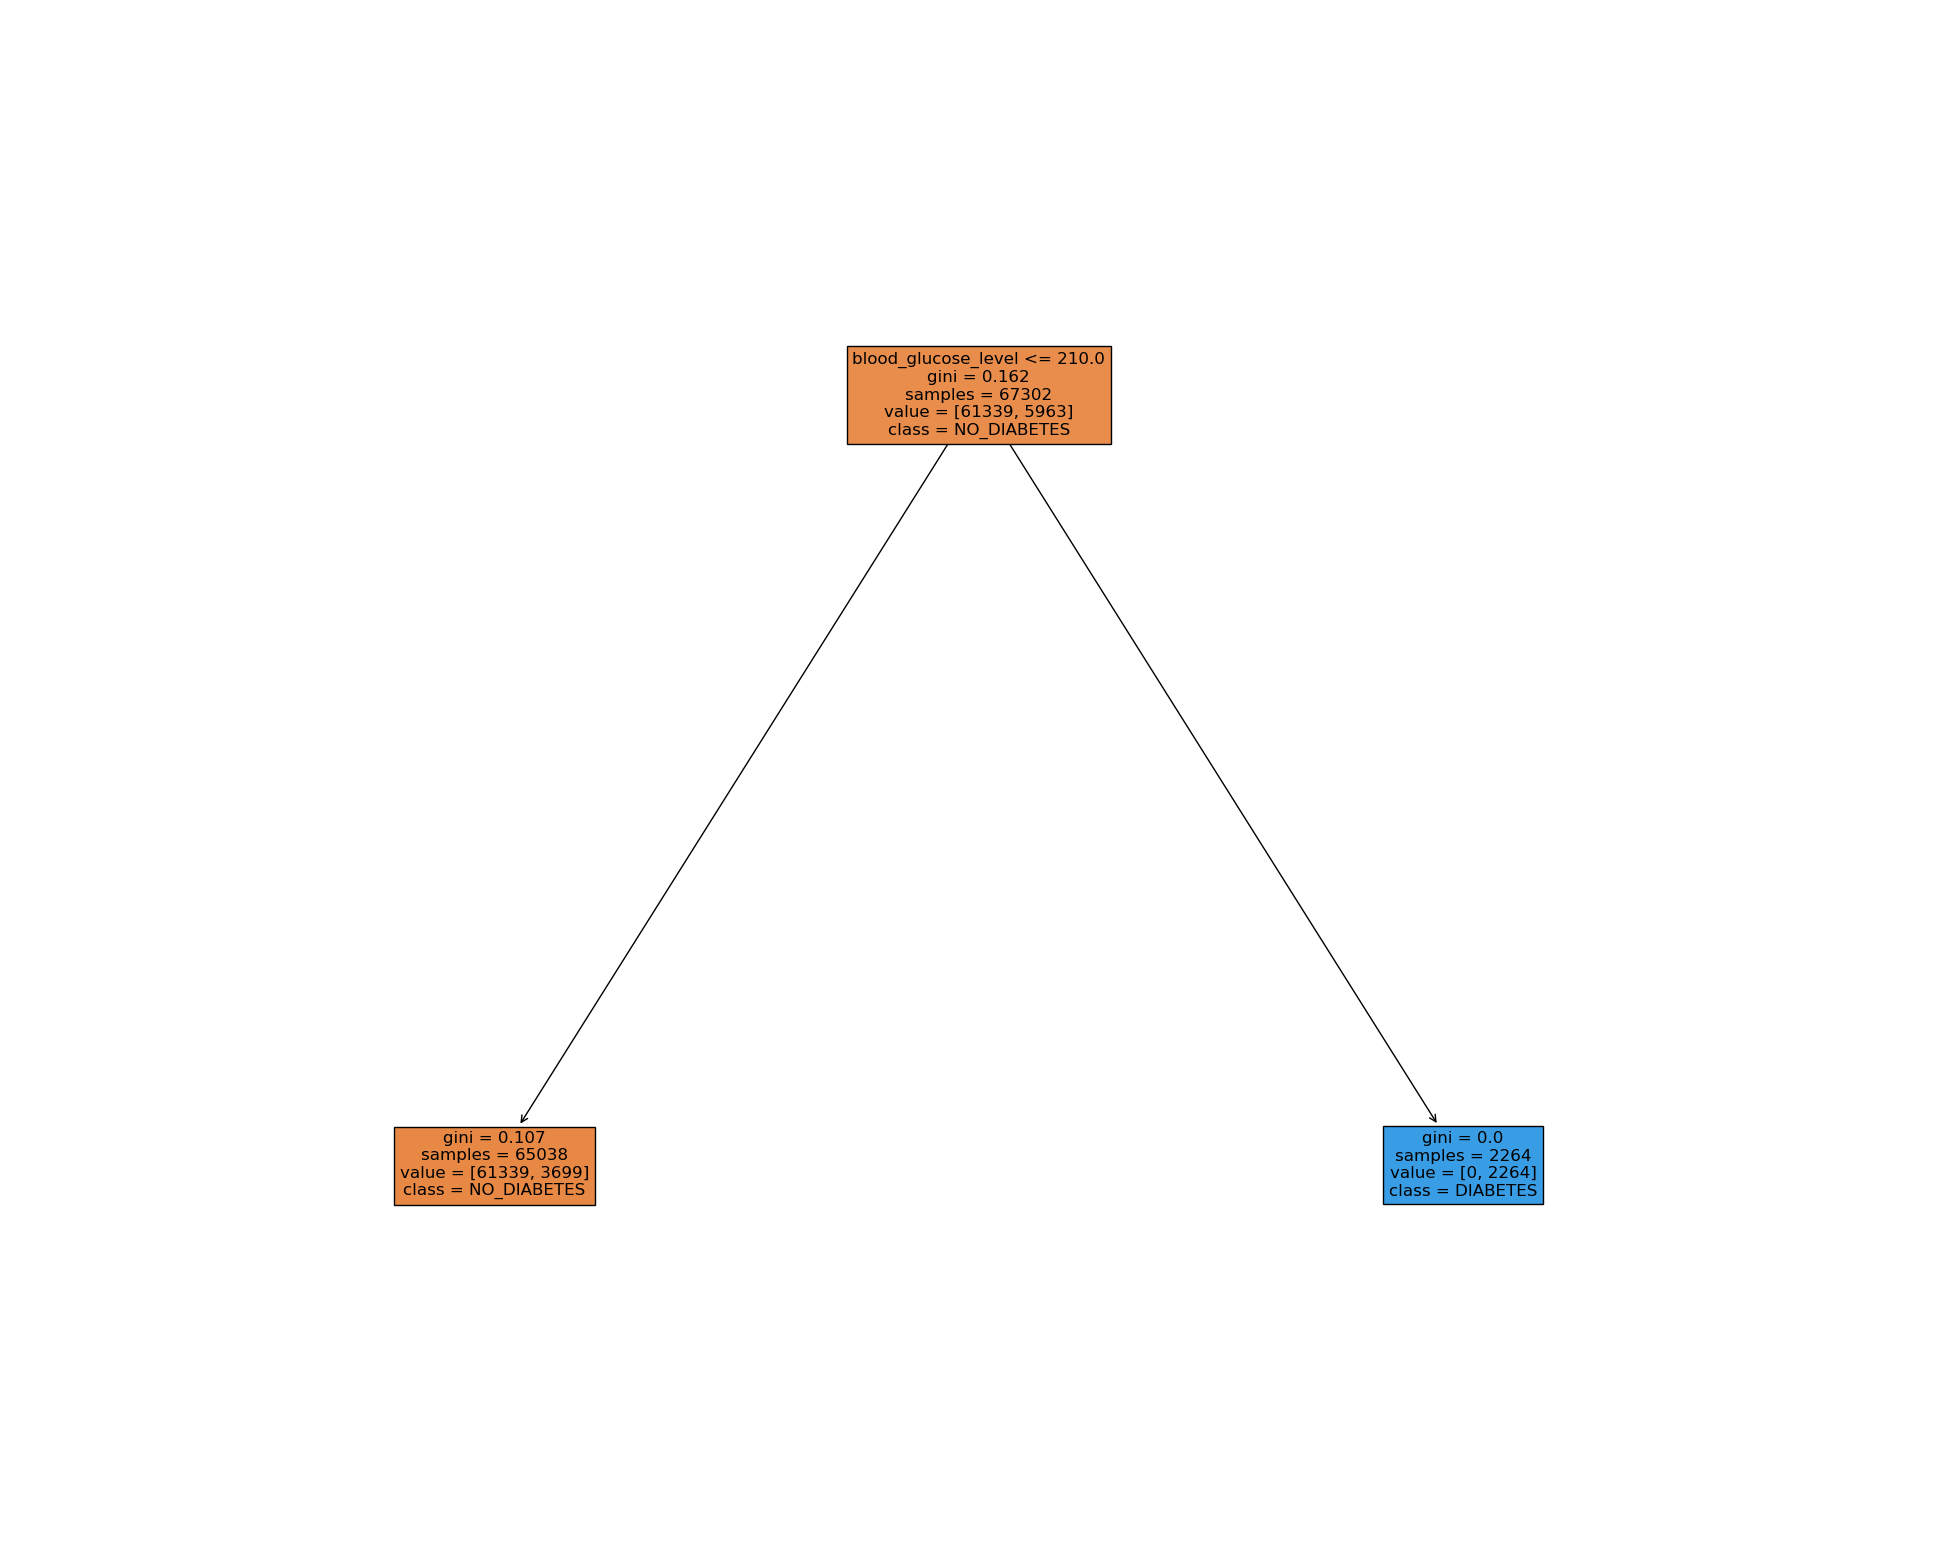

In [23]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'NO_DIABETES', 1:'DIABETES'},
                   filled=True,
                  fontsize=12)